In [2]:
ls

drive/  sample_data/


In [3]:
cd drive/My Drive/Plug/Tutorial_Dataset

/content/drive/My Drive/Plug/Tutorial_Dataset


In [4]:
!pwd

/content/drive/My Drive/Plug/Tutorial_Dataset


In [5]:
pip install tensorflow-gpu==2.1 

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.6/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 438, in run
    self._warn_about_conflicts(to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 568, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "/usr/local/lib/python3.6/

In [6]:
# Importing all the necessary dependencies
import os
import numpy
import itertools
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Specifying Paths
train_path = "train"
test_path = "test"
validation_path = "validation"

In [8]:
# List of classes
classnames=['3L', '1R', '0R', '2L', '1L', '2R', '3R', '4L', '0L', '4R', '5R', '5L']

In [9]:
# Creates Batches of Training Images, Each Containing 15 Images
train_batch=ImageDataGenerator().flow_from_directory(train_path, target_size=(128,128), classes=classnames, batch_size=15)

Found 15000 images belonging to 12 classes.


In [10]:
# Creates Batches of Testing Images, Each Containing 12 Images
test_batch=ImageDataGenerator().flow_from_directory(test_path, target_size=(128,128), classes=classnames, batch_size=12)

Found 3600 images belonging to 12 classes.


In [11]:
# Creates Batches of Validation Images, Each Containing 15 Images
validation_batch=ImageDataGenerator().flow_from_directory(validation_path, target_size=(128,128), classes=classnames, batch_size=15)

Found 2928 images belonging to 12 classes.


In [12]:
# Creating The Neural Network Model

model = Sequential()                                                # Initializing A Sequential Model  
model.add(Conv2D(128,(3,3), input_shape = (128,128, 3)))            # Creating The Input layer 128 by 128 image dimension and 3 channel for this set ofimages 128 Input Neurons and Kernel SIze 3 by 3
model.add(Activation("relu"))                                       # Specifying Activation Function of Input layer

model.add(Conv2D(64,(3,3)))                                         # Second Layer of Neurons (64) Kernel Size 3 by 3
model.add(Activation("relu"))                                       # Second layer Activation Function
model.add(MaxPooling2D(pool_size=(2,2)))                            # Max Pooling Layer (Reduces Quantity of Information Passed to The Next Layer by Selecting The most Prominent Feature)
model.add(Dropout(0.5))                                             # Helps Model Generalization and Prevents Over Fitting

              ################   REPEAT LAYER 2 AND ATLTER THE PARAMETERS TILL YOU OBTAING A SATISFACTORY RESULT #################

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

                                              ###############   END OF CONVOLUTION LAYER #############

model.add(Flatten())                                               # Flattens The Resulting Layer Into a 1 by N dimensional matrix
model.add(Dense(128))                                              # Fully Connected Layer
model.add(Activation("relu"))                                      # Activation Layer

model.add(Dense(12))                                               # Output Dense Layer
model.add(Activation('softmax'))                                   # Classificatio Output Function
          
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])                                 # Model Compiler

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 126, 126, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      73792     
_________________________________________________________________
activation_1 (Activation)    (None, 124, 124, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        1

In [14]:
# Fitting Model For Training
history = model.fit(train_batch, steps_per_epoch=1000, epochs=7, validation_data=test_batch, validation_steps=300, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1000 steps, validate for 300 steps
Epoch 1/7
1000/1000 [==============================] - 8969s 9s/step - loss: 1.0732 - accuracy: 0.9061 - val_loss: 0.0167 - val_accuracy: 0.9936
Epoch 2/7
1000/1000 [==============================] - 41s 41ms/step - loss: 0.1223 - accuracy: 0.9775 - val_loss: 0.0077 - val_accuracy: 0.9978
Epoch 3/7
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0297 - accuracy: 0.9949 - val_loss: 5.0411e-04 - val_accuracy: 0.9997
Epoch 4/7
1000/1000 [==============================] - 41s 41ms/step - loss: 0.0500 - accuracy: 0.9924 - val_loss: 4.2774e-05 - val_accuracy: 1.0000
Epoch 5/7
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0191 - accuracy: 0.9965 - val_loss: 3.0264e-04 - val_accuracy: 1.0000
Epoch 6/7
1000/1000 [==============================] - 40s 40ms/step - loss: 0.0483 - accuracy: 0.9934 - val_loss: 5.8473e-05 - val_accuracy: 1.0000
Epoch 7/7
1000/1000

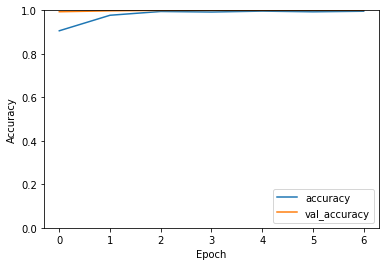

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [16]:
model.evaluate(validation_batch)

  ...
    to  
  ['...']
196/196 [==============================] - 1390s 7s/step - loss: 2.7115e-05 - accuracy: 1.0000


[2.7115020517350182e-05, 1.0]

In [17]:
model.save('hands2.1.h5')

In [18]:
# Convert keras model to TFLite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TF Lite model.
with tf.io.gfile.GFile('hands2_1.tflite', 'wb') as f:
  f.write(tflite_model)

Verifying Image Channels

In [ ]:
import cv2
image = cv2.imread("test/0L/f9db6cfe-041b-40f0-aeee-e34d2185d706_0L.png")

In [ ]:
image

array([[[58, 58, 58],
        [57, 57, 57],
        [54, 54, 54],
        ...,
        [50, 50, 50],
        [51, 51, 51],
        [52, 52, 52]],

       [[58, 58, 58],
        [56, 56, 56],
        [54, 54, 54],
        ...,
        [52, 52, 52],
        [52, 52, 52],
        [51, 51, 51]],

       [[56, 56, 56],
        [55, 55, 55],
        [53, 53, 53],
        ...,
        [55, 55, 55],
        [52, 52, 52],
        [50, 50, 50]],

       ...,

       [[49, 49, 49],
        [50, 50, 50],
        [51, 51, 51],
        ...,
        [68, 68, 68],
        [72, 72, 72],
        [73, 73, 73]],

       [[49, 49, 49],
        [50, 50, 50],
        [53, 53, 53],
        ...,
        [70, 70, 70],
        [74, 74, 74],
        [76, 76, 76]],

       [[48, 48, 48],
        [50, 50, 50],
        [54, 54, 54],
        ...,
        [72, 72, 72],
        [75, 75, 75],
        [77, 77, 77]]], dtype=uint8)

In [19]:
from tensorflow import keras
print(keras.__version__)

2.2.4-tf


In [ ]:
model=tf.keras.Model(img_inputs, output)